In [1]:
# Analisis de Cluster con Precio, Frecuencia y Manufacturer

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.text as mtext


# Carga tu dataframe aquí
df = pd.read_csv('c://users//Sergi//proyectos//proyecto_final//data//processed//vehicles_with_model_clean.csv')

df.columns


Index(['price', 'year', 'manufacturer', 'model', 'fuel', 'odometer',
       'transmission', 'drive', 'size', 'type', 'state', 'lat', 'long'],
      dtype='object')

In [2]:
# Create a 'count' column to store the frequency of each manufacturer
df['count'] = 1  # Assign 1 to each row to count manufacturers

# Group by 'manufacturer' and calculate price average and frequency
manufacturer_stats = df.groupby('manufacturer')[['price', 'count', 'manufacturer']].agg({'price': 'mean', 'count': 'sum'})

# Rename the columns
manufacturer_stats.columns = ['price_avg', 'frequency']

# Sort by frequency descending
manufacturer_stats = manufacturer_stats.sort_values(by='frequency', ascending=False)


# Imprimir la tabla con nombres de columnas al mismo nivel
print(manufacturer_stats[['price_avg', 'frequency']].head())



                 price_avg  frequency
manufacturer                         
ford          18500.960695      45210
chevrolet     17784.172745      34629
toyota        16130.654393      23709
honda         10875.695003      15951
nissan        11986.507561      13953


In [3]:
# Factorize manufacturer to convert it to numerical
manufacturer_stats['manufacturer_factorized'], _ = pd.factorize(manufacturer_stats.index)

# Select features for clustering
features = manufacturer_stats[['price_avg', 'frequency', 'manufacturer_factorized']]

# Definimos el número de clusters
n_clusters = 5  # Ajusta según tus necesidades

# Creamos el modelo KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Ajustamos el modelo a los datos
kmeans.fit(features)

# Asignamos la etiqueta del cluster a cada fabricante
manufacturer_stats['cluster'] = kmeans.labels_

# Visualización de resultados o cualquier otro análisis deseado
print(manufacturer_stats.head())


                 price_avg  frequency  manufacturer_factorized  cluster
manufacturer                                                           
ford          18500.960695      45210                        0        2
chevrolet     17784.172745      34629                        1        4
toyota        16130.654393      23709                        2        4
honda         10875.695003      15951                        3        0
nissan        11986.507561      13953                        4        0


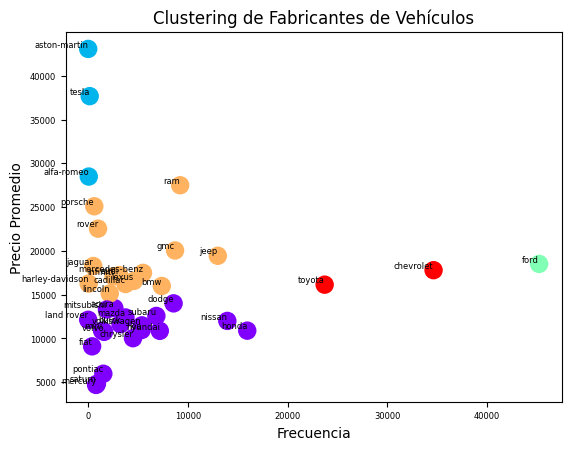

In [4]:
# 5 Clusters
# Crear figura y ejes
fig, ax = plt.subplots()

# Graficar scatter plot con colores por cluster
scatter = ax.scatter(manufacturer_stats['frequency'], manufacturer_stats['price_avg'], c=manufacturer_stats['cluster'], cmap='rainbow',s=150)

# Agregar etiquetas de fabricante al lado de cada punto
for index, row in manufacturer_stats.iterrows():
    ax.text(row['frequency'], row['price_avg'], index, fontsize=6, ha='right', va='bottom')

# Ajustar tamaño de fuente de los números en ejes
ax.tick_params(axis='both', which='major', labelsize=6)

# Añadir etiquetas de ejes y título
ax.set_xlabel('Frecuencia')
ax.set_ylabel('Precio Promedio')
ax.set_title('Clustering de Fabricantes de Vehículos')

# Añadir barra de color para los clusters
# plt.colorbar(scatter, ax=ax, label='Cluster')

# Mostrar gráfico
plt.show()


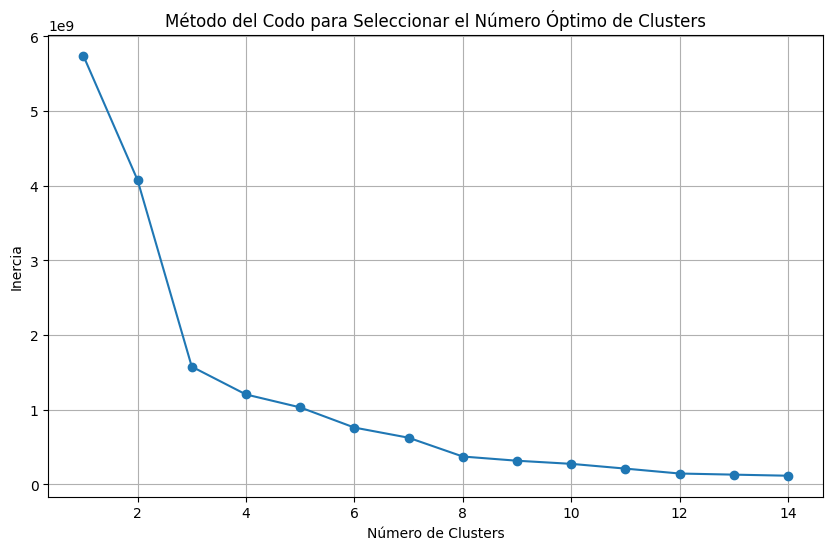

In [5]:
# Método del codo para encontrar el número óptimo de clusters
inertia = []
range_clusters = range(1, 15)

for n_clusters in range_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(range_clusters, inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo para Seleccionar el Número Óptimo de Clusters')
plt.grid(True)
plt.show()

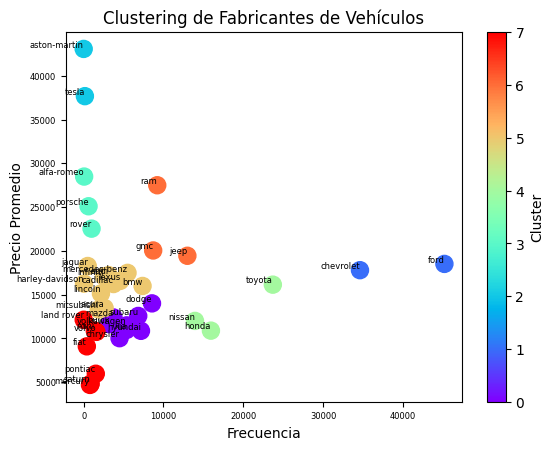

C:\Users\sergi\AppData\Local\Temp\ipykernel_18184\262718688.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='price_avg', data=manufacturer_stats, palette='rainbow')


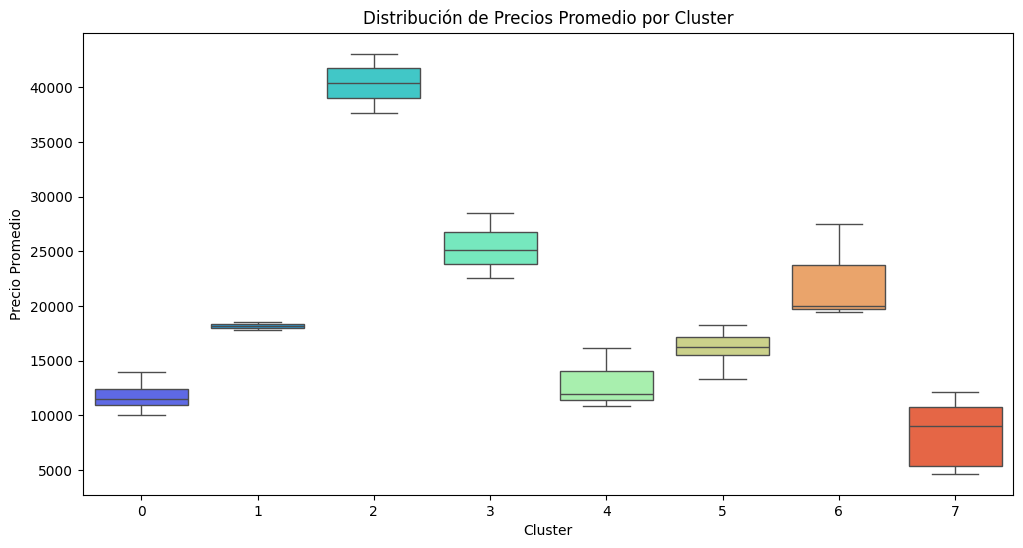

In [11]:
# Estimamos 3 probables optimos.  3,4 y 8
# Primero probamos 8 Clusters
# Factorize manufacturer to convert it to numerical
manufacturer_stats['manufacturer_factorized'], _ = pd.factorize(manufacturer_stats.index)

# Select features for clustering
features = manufacturer_stats[['price_avg', 'frequency', 'manufacturer_factorized']]

# Definimos el número de clusters
n_clusters = 8  # Ajusta según tus necesidades

# Creamos el modelo KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Ajustamos el modelo a los datos
kmeans.fit(features)

# Asignamos la etiqueta del cluster a cada fabricante
manufacturer_stats['cluster'] = kmeans.labels_

# Crear figura y ejes
fig, ax = plt.subplots()

# Graficar scatter plot con colores por cluster
scatter = ax.scatter(manufacturer_stats['frequency'], manufacturer_stats['price_avg'], c=manufacturer_stats['cluster'], cmap='rainbow', s=150)

# Agregar etiquetas de fabricante al lado de cada punto
for index, row in manufacturer_stats.iterrows():
    ax.text(row['frequency'], row['price_avg'], index, fontsize=6, ha='right', va='bottom')

# Ajustar tamaño de fuente de los números en ejes
ax.tick_params(axis='both', which='major', labelsize=6)

# Añadir etiquetas de ejes y título
ax.set_xlabel('Frecuencia')
ax.set_ylabel('Precio Promedio')
ax.set_title('Clustering de Fabricantes de Vehículos')

# Añadir barra de color para los clusters
plt.colorbar(scatter, ax=ax, label='Cluster')

# Mostrar gráfico
plt.show()

# Crear figura para los boxplots
plt.figure(figsize=(12, 6))

# Crear los boxplots para cada cluster
sns.boxplot(x='cluster', y='price_avg', data=manufacturer_stats, palette='rainbow')

# Añadir etiquetas de ejes y título
plt.xlabel('Cluster')
plt.ylabel('Precio Promedio')
plt.title('Distribución de Precios Promedio por Cluster')

# Mostrar gráfico
plt.show()

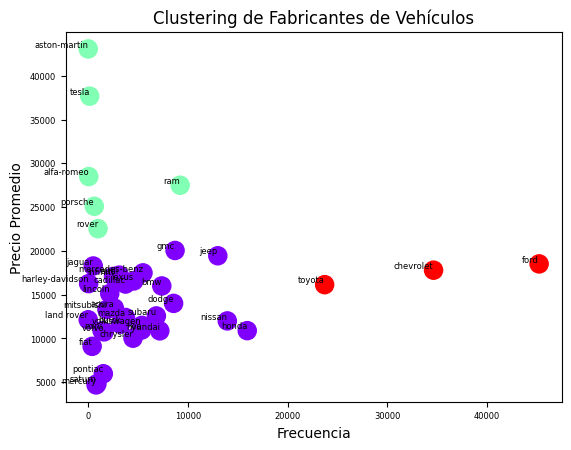

C:\Users\sergi\AppData\Local\Temp\ipykernel_18184\1426575002.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='price_avg', data=manufacturer_stats, palette='rainbow')


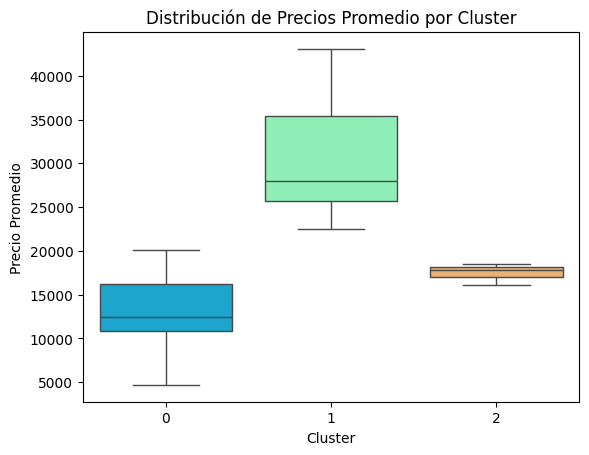

In [12]:
# Probamos 3 Clusters
# Factorize manufacturer to convert it to numerical
manufacturer_stats['manufacturer_factorized'], _ = pd.factorize(manufacturer_stats.index)

# Select features for clustering
features = manufacturer_stats[['price_avg', 'frequency', 'manufacturer_factorized']]

# Definimos el número de clusters
n_clusters = 3  # Ajusta según tus necesidades

# Creamos el modelo KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Ajustamos el modelo a los datos
kmeans.fit(features)

# Asignamos la etiqueta del cluster a cada fabricante
manufacturer_stats['cluster'] = kmeans.labels_

# Crear figura y ejes
fig, ax = plt.subplots()

# Graficar scatter plot con colores por cluster
scatter = ax.scatter(manufacturer_stats['frequency'], manufacturer_stats['price_avg'], c=manufacturer_stats['cluster'], cmap='rainbow', s=170)

# Agregar etiquetas de fabricante al lado de cada punto
for index, row in manufacturer_stats.iterrows():
    ax.text(row['frequency'], row['price_avg'], index, fontsize=6, ha='right', va='bottom')

# Ajustar tamaño de fuente de los números en ejes
ax.tick_params(axis='both', which='major', labelsize=6)

# Añadir etiquetas de ejes y título
ax.set_xlabel('Frecuencia')
ax.set_ylabel('Precio Promedio')
ax.set_title('Clustering de Fabricantes de Vehículos')

# Añadir barra de color para los clusters
# plt.colorbar(scatter, ax=ax, label='Cluster')

# Mostrar gráfico
plt.show()

# Crear los boxplots para cada cluster
sns.boxplot(x='cluster', y='price_avg', data=manufacturer_stats, palette='rainbow')

# Añadir etiquetas de ejes y título
plt.xlabel('Cluster')
plt.ylabel('Precio Promedio')
plt.title('Distribución de Precios Promedio por Cluster')

# Mostrar gráfico
plt.show()

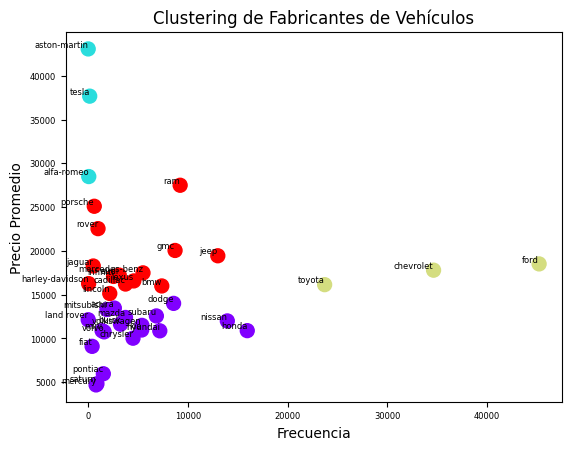

C:\Users\sergi\AppData\Local\Temp\ipykernel_18184\923531486.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='price_avg', data=manufacturer_stats, palette='rainbow')


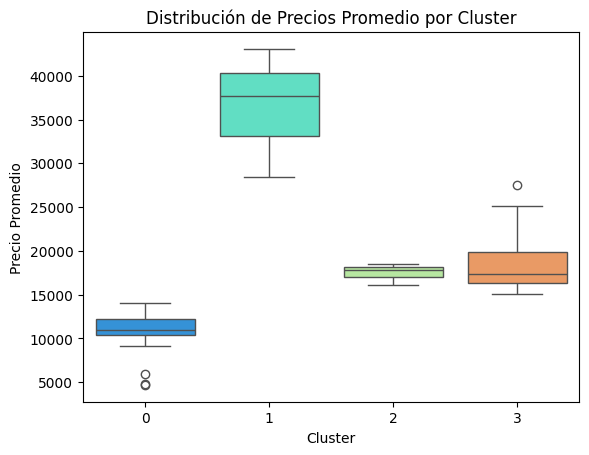

In [13]:
# Probamos 4 Clusters
# Factorize manufacturer to convert it to numerical
manufacturer_stats['manufacturer_factorized'], _ = pd.factorize(manufacturer_stats.index)

# Select features for clustering
features = manufacturer_stats[['price_avg', 'frequency', 'manufacturer_factorized']]

# Definimos el número de clusters
n_clusters = 4  # Ajusta según tus necesidades

# Creamos el modelo KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Ajustamos el modelo a los datos
kmeans.fit(features)

# Asignamos la etiqueta del cluster a cada fabricante
manufacturer_stats['cluster'] = kmeans.labels_

# Crear figura y ejes
fig, ax = plt.subplots()

# Graficar scatter plot con colores por cluster
scatter = ax.scatter(manufacturer_stats['frequency'], manufacturer_stats['price_avg'], c=manufacturer_stats['cluster'], cmap='rainbow', s=100)

# Agregar etiquetas de fabricante al lado de cada punto
for index, row in manufacturer_stats.iterrows():
    ax.text(row['frequency'], row['price_avg'], index, fontsize=6, ha='right', va='bottom')

# Ajustar tamaño de fuente de los números en ejes
ax.tick_params(axis='both', which='major', labelsize=6)

# Añadir etiquetas de ejes y título
ax.set_xlabel('Frecuencia')
ax.set_ylabel('Precio Promedio')
ax.set_title('Clustering de Fabricantes de Vehículos')

# Añadir barra de color para los clusters
# plt.colorbar(scatter, ax=ax, label='Cluster')

# Mostrar gráfico
plt.show()

# Crear los boxplots para cada cluster
sns.boxplot(x='cluster', y='price_avg', data=manufacturer_stats, palette='rainbow')

# Añadir etiquetas de ejes y título
plt.xlabel('Cluster')
plt.ylabel('Precio Promedio')
plt.title('Distribución de Precios Promedio por Cluster')

# Mostrar gráfico
plt.show()